A Survey on Technology Choice
======


## Hypothesis

It is my prediction that the primary predictors of the priority of helpful discussion on StackExchange are development experience and English proficiency.

In [21]:
# For nicer printing
options(digits=2);

In [22]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [23]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

### Interpret  basic summaries

In [24]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


Interpret correlations: onlys start vs End, calculate differene instead


### Simple questions

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

## Exploration of the Data

I plot the response frequencies to get a better understanding of the distribution of the data.

In [120]:
# Only examine the non-empty responses.
#print(dim(data))
mydim <- data[,28]
#print(data[,29])
sum <- 0
not <- 0
low <- 0
med <- 0
hgh <- 0
ess <- 0
for (i in 1:dim(data)[1]) {
    if (mydim[i] != "") {
        if(mydim[i] == "Not a Priority")
        {
            not <- not + 1
        }
        else if(mydim[i] == "Low Priority")
        {
            low <- low + 1
        }
        else if(mydim[i] == "Medium Priority")
        {
            med <- med + 1
        }
        else if(mydim[i] == "High Priority")
        {
            hgh <- hgh + 1
        }
        else #if(mydim[i] == "Essential")
        {
            ess <- ess + 1
        }
        
        sum <- sum + 1
        #print(paste("[",i,"]=",mydim[i]));
    }
}

valids = vector(,length=sum)
ctr <- 1
for (i in 1:dim(data)[1]) {
    if (mydim[i] != "") {
        valids[ctr] <- i;
        ctr <- ctr +1;
    }
}
#print(sum)
#print(not)
#print(low)
#print(med)
#print(hgh)
#print(ess)
#print(histo)
#hist(data$PG5_3HDS)
#hist(histo)

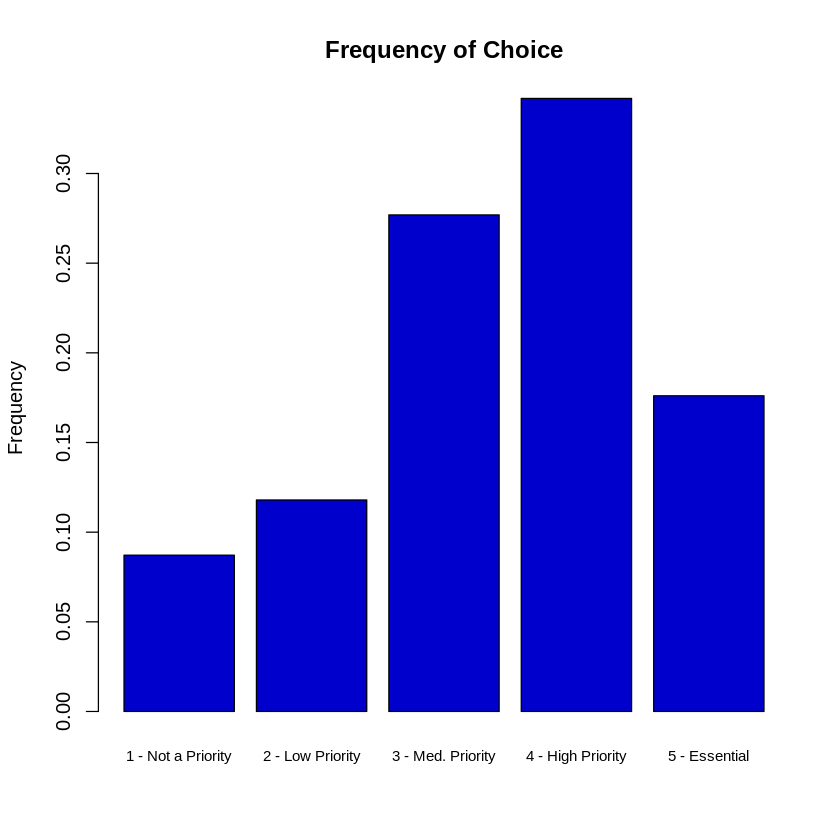

In [26]:
# Build the histogram.
histo <- c(not, low, med, hgh, ess)
histo <- histo/sum

# Standardize the data.
avg <- 0
expec_sq <- 0
for (i in 1:5) {
    avg <- avg + i*histo[i];
    expec_sq <- expec_sq + i*i*histo[i];
}
std_dev <- expec_sq - (avg*avg)

#print(avg)
#print(std_dev)

x_1 <- (1-avg)/std_dev
x_2 <- (2-avg)/std_dev
x_3 <- (3-avg)/std_dev
x_4 <- (4-avg)/std_dev
x_5 <- (5-avg)/std_dev

# Plot the histogram.
xvals = c(x_1, x_2, x_3, x_4, x_5)
names(histo) <- c("1 - Not a Priority", "2 - Low Priority", "3 - Med. Priority", "4 - High Priority", "5 - Essential")
#namelab <- c("1 - Not Priority", "2 - Low Priority", "3 - Med. Priority", "4 - High Priority", "5 - Essential")
#names(histo) <- c("1", "2", "3", "4", "5")
plt <- barplot(histo, ylab="Frequency", main="Frequency of Choice", col="blue3", cex.names=0.75)
#text(plt, namelab, srt=60)

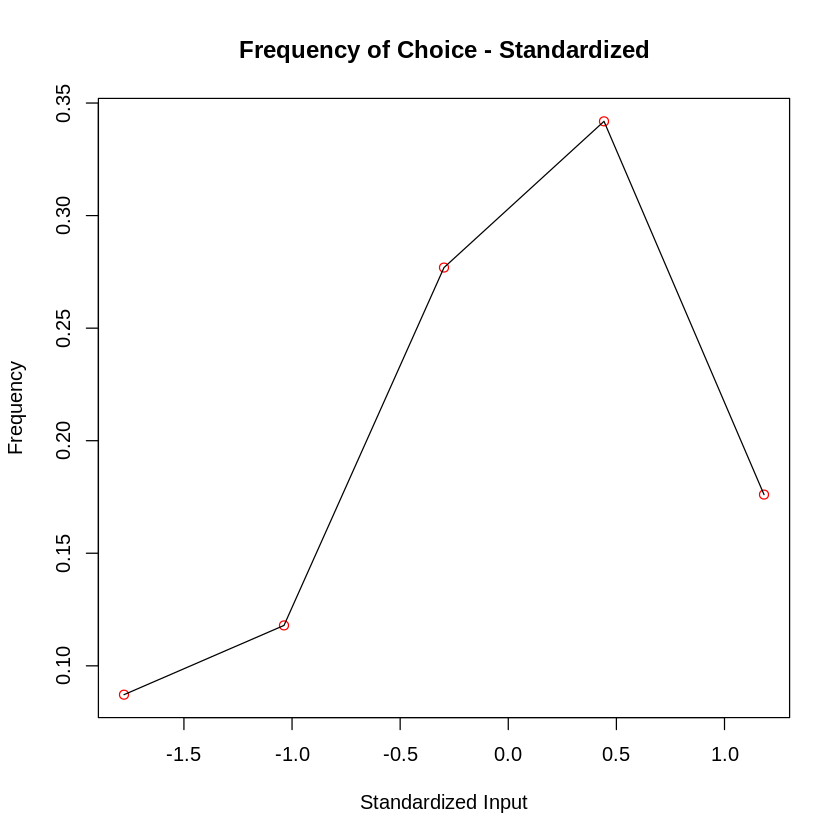

In [27]:
# Plot against standardized data.
plot(xvals, histo, xlab="Standardized Input", ylab="Frequency", main="Frequency of Choice - Standardized", col="red")
lines(xvals, histo)

## Observations

The responses are skewed to the right. This means that there are more survey respondents who found helpful discussion on StackExchange to be a higher priority than there are who found it to be a lower priority. Standardizing these results does not change the skewness of the distribution.

## Explanation of How Measures are Calculated from the Data, Transformation, and Cleaning

First, I only parse the data samples for which a response was given. Then, I encode the answer options from the survey into numerical values. These values are in the interval [0,8], where '0' represents not answered (for optional questions) or the first choice (for required questions). '8' represents "other." The other values are the relative placement of the answer choice in the given options scaled in the range [0,8]. For example, if there are three answer choices for a required question, then if the respondent selects the first answer, then the encoded value is '0'; if he or she selects the second, then the value is '4' (50% of 8); and if he or she selects the third, then the value is '8'.

In [269]:
# Pair down data before running this next line.
data[is.na(data)] <- ""

# Convert non-numeric values to numeric values.
for (i in 1:dim(data)[1]) {
    for (j in 1:dim(data)[2]) {
        #print(i+j)
        #print(is.na(data[i,][j]))
        #if( is.na(data[i,][j]) == FALSE )
        if( data[i,][j] != "")
        {
            # Generic cases:
            if ( data[i,][j] == "Not a Priority" || data[i,][j] == "Less than 2 years" || data[i,][j] == "R" || data[i,][j] == "C/C++" || data[i,][j] == "Java" || data[i,][j] == "Python" || data[i,][j] == "Javascript" || data[i,][j] == "Go" || data[i,][j] == "C#" || data[i,][j] == "1" || data[i,][j] == "Native" || data[i,][j] == "18 - 24" || data[i,][j] == "For personal work and/or research use" || data[i,][j] == "For a wider audience, such as developers of other packages or other software" || data[i,][j] == "For a training / class that I took") {
                newdata[i,][j] <- 1;
            }
            else if ( data[i,][j] == "Low Priority"    || data[i,][j] == "2 - 5 years" || data[i,][j] == "2 - 3" || data[i,][j] == "Not native - full working proficiency" || data[i,][j] == "25 - 34") {
                newdata[i,][j] <- 2;
            }
            else if ( data[i,][j] == "Medium Priority" || data[i,][j] == "6 - 8 years" || data[i,][j] == "4 - 6" || data[i,][j] == "Not native - sufficient working proficiency" || data[i,][j] == "35 - 44") {
                newdata[i,][j] <- 3;
            }
            else if ( data[i,][j] == "High Priority"   || data[i,][j] == "9 - 12 years" || data[i,][j] == "7 - 10" || data[i,][j] == "Not native - limited working proficiency" || data[i,][j] == "45 - 54") {
                newdata[i,][j] <- 4;
            }
            else if ( data[i,][j] == "Essential"       || data[i,][j] == "13 - 19 years" || data[i,][j] == "11 - 15" || data[i,][j] == "Not native - passable" || data[i,][j] == "55 - 64") {
                newdata[i,][j] <- 5;
            }
            else if ( data[i,][j] == "20 years or more" || data[i,][j] == "16 - 25" || data[i,][j] == "Not native - very limited" || data[i,][j] == "65 and over") {
                newdata[i,][j] <- 6;
            }
            else if ( data[i,][j] == "More than 25") {
                newdata[i,][j] <- 7;
            }
            else # Not sure
            {
                newdata[i,][j] <- 8;
            }
            
            # Special cases:
            if( data[i,][j] == "Yes" || data[i,][j] == "Software Engineer" || data[i,][j] == "The core \"data.frame\" object lacked functionality that I needed") {
                newdata[i,][j] <- 0.0;
            }
            else if ( data[i,][j] == "Female" || data[i,][j] == "Chose the package to be compatible with other packages in my project") {
                newdata[i,][j] <- 2.0;                
            }
            else if ( data[i,][j] == "Data Scientist" || data[i,][j] == "No" || data[i,][j] == "Male" || data[i,][j] == "I saw a recommendation for the package" ) {
                newdata[i,][j] <- 4.0;
            }
            else if ( data[i,][j] == "Prefer not to answer" || data[i,][j] == "I didn't choose to use the package, it was included implicitly / unintentionally" ) {
                newdata[i,][j] <- 6.0;
            }
        }
        else
        {
            newdata[i,][j] <- 0; # Denotes missing value.
        }
    }
}

In [382]:
# Create the data frame for the regression.
cleandata = newdata[valids,]
indexointerest = c(8,9,10,11,13,15,62,64,65,66,67,68,69,70,73,75,77,79,81)
indexoaug = c(indexointerest, 28)

y <- cleandata[,28]
x <- cleandata[,indexointerest]
aug <- cleandata[,indexoaug]
augfrm <- as.data.frame(aug)
aug <- augfrm

## Descriptive Analysis of the Proposed Measures

Intuitively, if someone does not have very much development experience, then he or she will be more likely to benefit from discussion on the help board. However, if someone is more experienced, then the discussion may not be a priority because he or she would have a lot more insight. In addition, if someone has more experience, he or she may be less likely to utilize StackExchange as a resource, leaving those are less experienced more likely to use it and therefore benefit from it. Also, if one does not have extensive knowledge of he English language, then he or she may be predisposed to not benefitting as much from helpful discussion because the ideas may not be conveyed as clearly to the reader.

## Correlation Analysis Using Sanitized Data

We examine the correlations to estimate the most influential predictors. There are no highly correlated measures and therefore none of them need to be dropped.

In [383]:
# Find all correlations.
#cor(aug,method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

# Find top correlations.
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res;
  res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}

hiCor(aug,.7)


<0 x 0 matrix>

## Perform Principal Component Analysis

We use Principal Component Analysis to reduce the dimensionality of the data. By inspection of the plot of the Fraction of Variance explained, we see that the first eleven principal components explain 70% of the variance.

      V7  V16  V19
PC1 0.51 0.49 0.31
      V1    V3   V4   V11
PC2 0.36 -0.35 0.37 -0.39
       V1   V2   V8  V14
PC3 -0.34 0.37 0.33 0.42
       V1    V4    V6   V12   V17
PC4 -0.39 -0.37 -0.31 -0.32 -0.32
     V17  V18
PC5 0.51 0.62
      V3   V5  V11  V15
PC6 0.48 0.36 0.31 0.32
       V6   V10  V20
PC7 -0.54 -0.31 0.45
       V2   V3   V8  V19
PC8 -0.49 0.39 0.37 0.39
     V5 V13
PC9 0.4 0.8


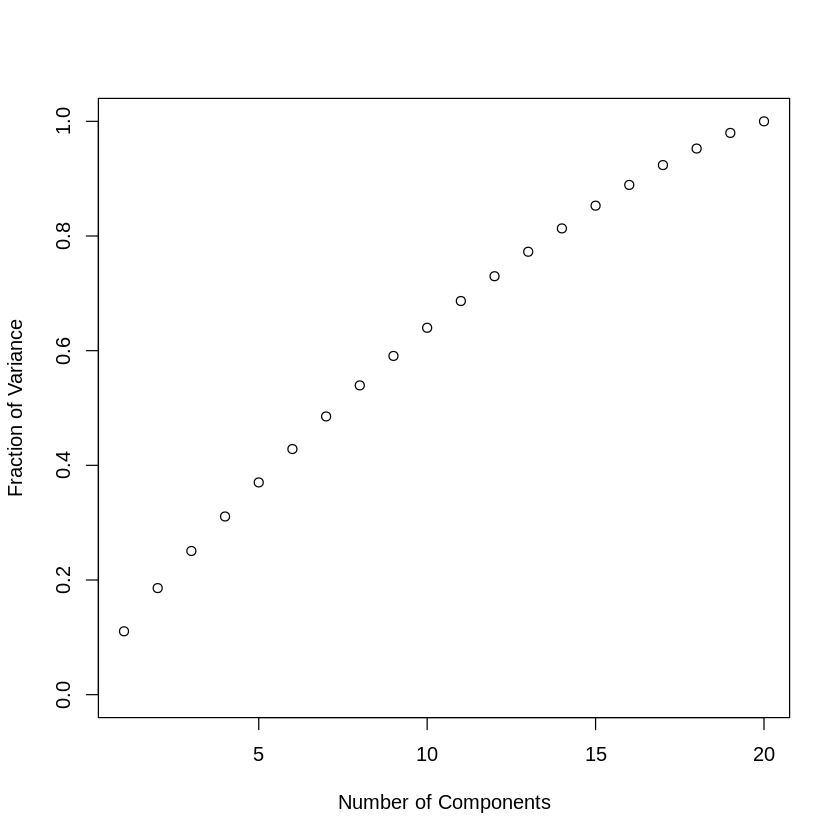

In [384]:
#augfrm <- as.data.frame(aug)
#logs <- cbind(augfrm$V20, log(augfrm$V1+1), log(augfrm$V2+1), log(augfrm$V3+1), log(augfrm$V4+1),
#              log(augfrm$V5+1), log(augfrm$V6+1), log(augfrm$V7+1), log(augfrm$V8+1), log(augfrm$V9+1),
#              log(augfrm$V10+1), log(augfrm$V11+1), log(augfrm$V12+1), log(augfrm$V13+1), log(augfrm$V14+1),
#              log(augfrm$V15+1), log(augfrm$V16+1), log(augfrm$V17+1), log(augfrm$V18+1), log(augfrm$V19+1));
#aug <- data.frame(logs)
#augfrm <- aug
plot(1:20,cumsum(prcomp(aug, retx=F,scale=T)$sdev^2)/sum(prcomp(aug, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of Components",ylab="Fraction of Variance");

#cumsum(prcomp(x, retx=F,scale=T)$sdev^2)/sum(prcomp(x, retx=F,scale=T)$sdev^2)
res<-prcomp(aug, retx=F,scale=T)$rotation[,1:9];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:9)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

## Regress Predictors

In [385]:
# Analyze aug.
#augfrm <- as.data.frame(aug)
# Swap columns so that response variable is the first.
#augfrm <- augfrm[,c("V20","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19")]

res <- c();
vnam <- names(augfrm);
#print(vnam)
for (i in 2:dim(augfrm)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=augfrm))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];
#print(augfrm)

V7,7,0.38
V16,16,0.34
V19,19,0.15
V11,11,0.13
V14,14,0.13
V15,15,0.13
V12,12,0.12
V9,9,0.11
V3,3,0.08
V18,18,0.08
V10,10,0.07


## Fitting of the Statistical Model

We do the regression to select a model. Interestingly, the best model was found to be the quasipoisson distribution of the single variable, which is the respondents' answer to question three: "Which of the following is the closest to why you chose that package?" The p-value is within the threshold of statistical significance, and the error is minimized using this model.

In [388]:
#fmla ~ V20 ~ V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19
#fmla ~ V20 ~ V6
fmla ~ V20 ~ V6

fmla ~ V20 ~ V6

In [389]:
library(mgcv)
library(MASS)
#mod <- glm(V20 ~ V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19,family=Gamma,data=augfrm);
#mod <- glm(V20 ~ V16+V17,family=quasibinomial,data=augfrm);
#mod <- glm(V20 ~ V6+V16+V17,family=quasibinomial,data=augfrm);
#mod <- glm(V20 ~ V6,family=quasibinomial,data=augfrm);   #-- good
#summary(mod);
#mod <- glm(V20 ~ V6,family=inverse.gaussian,data=augfrm); #-- good
#summary(mod);
#mod <- glm(V20 ~ V6,family=gaussian,data=augfrm);    #-- good
#summary(mod);
#---------------
mod <- glm(V20 ~ V6,family=quasipoisson,data=augfrm);    #-- good
summary(mod);
#mod <- glm(V20 ~ V6,family=Gamma,data=augfrm);    #-- good
#summary(mod);
#mod <- glm.nb(V20 ~ V6,data=augfrm);    #-- good
#summary(mod);
###start
#augfrm$V20 <- augfrm$V20/5.0
#mod <- glm(V20 ~ V6,family=quasibinomial,data=augfrm);    #-- good
#summary(mod);
###end
#mod <- glm(V20 ~ V6,family=quasi,data=augfrm);    #-- good
#summary(mod);
##mod <- lm(V20 ~ V6,data=augfrm);    #-- good
##summary(mod);
##mod <- lm(V20 ~ V7+V16+V19,data=augfrm);    #-- good
##summary(mod);
#mod <- glm(V20 ~ V7+V16+V19,family=quasipoisson,data=augfrm);    #-- good
#summary(mod);


Call:
glm(formula = V20 ~ V6, family = quasipoisson, data = augfrm)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.576  -0.270   0.265   0.375   0.909  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.25058    0.01872   66.81   <2e-16 ***
V6          -0.00962    0.00457   -2.11    0.036 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 0.4)

    Null deviance: 262.33  on 584  degrees of freedom
Residual deviance: 260.55  on 583  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


In [390]:
anova(mod, test="Chi");
anova(mod, test="Chisq");
drop1(mod, test="Chi");
library(car)
#vif(mod);

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,584,262,NA
V6,1,1.8,583,261,0.035


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,584,262,NA
V6,1,1.8,583,261,0.035


,Df,Deviance,scaled dev.,Pr(>Chi)
<none>,NA,261,NA,NA
V6,1,262,4.5,0.035


## Interpretation of the Coefficients

For this model, there are only two coefficients, including the intercept, due to the model being represented most accurately using a single variable. The intercept is 1.25125, and the slope of the variable corresponding to the answers for question three is -0.00966. The line defined by -0.00966*V6 + 1.25125 is the exponent in the pdf of the distribution.

In [391]:
#ys <- augfrm$V20
#xs <- augfrm$V6
#print(ys)
#print(xs)
#plot(xs,ys,ylim=c(0,20),xlab="Measure",ylab="Response");
#plot(V20 ~ V6, augfrm)
#plot(V20 ~ V6, augfrm)


## Recommendations for how to improve the survey:

It may be useful to ask those who are taking the survey if they had trouble answering any of the questions. Some of them may have taken longer to complete certain questions by virtue of the questions having different forms (e.g. click-and-drag vs multiple choice). There could also be an option for "Other" or "I don't know." This could potentially help remove noise in the data if a person did not know to which category an idea should belong (the form of question PG5_3HDS) - as in the case of  the third question. There could also be a final question regarding how thoroughly they believe their thoughts to this survey are captured by their responses. If a survey respondent has 'very limited' English proficiency, then there may be noise in the survey data by virtue of them not being able to fully understand the questions and answers. 